## activation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step_function_2(x):
    y = x > 0  # broadcast
    return y.astype(np.int)

In [3]:
print(step_function_2(np.array([-1.,2.,3.])))

[0 1 1]


In [4]:
def step_function(x):
    return np.array(x > 0, dtype = np.int)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def tanh(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

In [7]:
def relu(x):
    return np.maximum(0, x)

In [8]:
def softplus(x):
    return np.log(1 + np.exp(x))

In [9]:
def identify_function(x):
    return x

In [10]:
def softmax(x):
    cons_c = np.max(x)
    exp_x = np.exp(x - cons_c)  # prevent overflow
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

In [11]:
x = np.arange(-10,10,0.1)
y = step_function(x)
y1 = sigmoid(x)
y2 = tanh(x)
y3 = relu(x)
y4 = softplus(x)

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.subplots_adjust(left=0.2, wspace=0.6)

In [13]:
ax1.plot(x, y, linestyle="--", label="step")
ax1.plot(x, y1, label="sigmoid", linewidth=2, color="red")
ax1.plot(x, y2, label="tanh", linewidth=2, color="green")
ax1.set_ylim(-1.1,1.1)
ax1.legend(loc=4)

In [14]:
ax2.plot(x, y3, label="relu", color="red", linewidth=1)
ax2.plot(x, y4, label="softplus", color="green", linewidth=3, linestyle="--")
ax2.set_ylim(-1,12)
ax2.legend(loc=4)

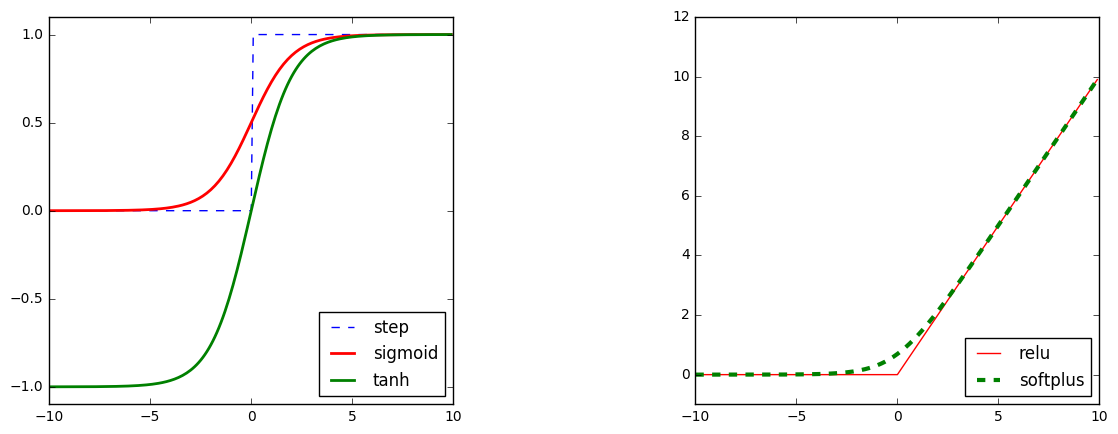

In [15]:
plt.show()

## multidimension in numpy

In [16]:
d1 = np.array([1.,2.,3.,4.])
print(d1)
print(np.ndim(d1))
print(d1.shape)
print(d1.shape[0])
print()

[1. 2. 3. 4.]
1
(4,)
4



In [17]:
d2 = np.array([[1,2], [3,4], [5,6]])
print(d2)
print(np.ndim(d2))
print(d2.shape)
print()

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)



In [18]:
# dot product
d3 = np.array([[1,2],[3,4]])
d4 = np.array([[5,6],[7,8]])
print(d3)
print(d4)
print(np.dot(d3, d4))
print(d3 * d4)
print()

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[ 5 12]
 [21 32]]



In [19]:
d5 = np.array([[1,2,3], [4,5,6]])    # 2 x 3
d6 = np.array([[1,2], [3,4], [5,6]])    # 3 x 2
print(d5)
print(d6)
print(np.dot(d5, d6))
print()

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]



In [20]:
d7 = np.array([2,2])
print(d7)
print(d7.shape)
print(np.dot(d7, d5))
print()

[2 2]
(2,)
[10 14 18]



In [21]:
d8 = np.array([[2],[2],[2]])
print(d8)
print(d8.shape)
print(np.dot(d5, d8).shape)
print(np.dot(d5, d8).flatten())
print()

[[2]
 [2]
 [2]]
(3, 1)
(2, 1)
[12 30]



## NN

In [22]:
d9 = np.array([[1,3,5],[2,4,6]])    # regrads as y (hidden or output layer)
print(d9)
print(d9.shape)
d10 = np.array([1,1])    # regrads as input
print(d10)
print(d10.shape)
print(np.dot(d10, d9))

[[1 3 5]
 [2 4 6]]
(2, 3)
[1 1]
(2,)
[ 3  7 11]


## 3-layers NN

In [23]:
X = np.array([1.0, 0.5])    # (2,) => 1 x 2
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2 x 3
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1    # (3,) => 1 x 3
Z1 = sigmoid(A1)
print(A1)
print(Z1)
print()

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]



In [24]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3 x 2
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)    # (2,) => 1 x 2
print(A2)
print(B2)
print()

[0.51615984 1.21402696]
[0.1 0.2]



In [25]:
W3 = np.array([[.1, .3],[.2, .4]])    # 2 x 2
B3 = np.array([.1, .2])
A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
print(A3)
print(Y)
print()

[0.31682708 0.69627909]
[0.31682708 0.69627909]



In [26]:
def parameters():
    parameter = {}
    parameter["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    parameter["b1"] = np.array([0.1, 0.2, 0.3])
    parameter["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    parameter["b2"] = np.array([0.1, 0.2])
    parameter["W3"] = np.array([[.1, .3],[.2, .4]])
    parameter["b3"] = np.array([.1, .2])
    return parameter

In [27]:
def forward(para, X):
    W1, W2, W3 = para["W1"], para["W2"], para["W3"]
    b1, b2, b3 = para["b1"], para["b2"], para["b3"]

    A1 = np.dot(X, W1) + b1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + b3
    Z3 = identify_function(A3)
    
    return Z3

In [28]:
def forward_softmax(para, X):
    W1, W2, W3 = para["W1"], para["W2"], para["W3"]
    b1, b2, b3 = para["b1"], para["b2"], para["b3"]

    A1 = np.dot(X, W1) + b1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + b3
    Z3 = softmax(A3)
    
    return Z3

In [29]:
x = np.array([1.0, 0.5])
para = parameters()
print(forward(para, x))
print(forward_softmax(para, x))

[0.31682708 0.69627909]
[0.40625907 0.59374093]
